# Performance of baseline and transfer learning models
In this section we are visualizing the performance of the model measured as the concordance index across the model training iterations (epochs). 

In [1]:
import sys
sys.path.append('../codeocean/environment/clinical_transformer/')
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
from xai.models.explainer import TransformerSurvivalEvaluator
from xai.models.explainer import compute_performance_folds

2025-08-12 20:34:53.326760: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-12 20:34:53.382558: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-12 20:34:53.726480: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shenwanxiang/anaconda3/lib:
2025-08-12 20:34:53.726515: W tensorflow/compiler/xla/stream_exe

In [3]:
from samecode.plot.pyplot import subplots
import seaborn as sns

In [4]:
import numpy as np 
import pandas as pd

In [5]:
experiments = [
    ['Survival', '', 'Baseline'],
    ['TransferLearningSurvival', 'model.E001000.h5', 'TransferLearning'],
]

res = []
exps = []
metric = 'epoch_sigmoid_concordance'

res = []
exps = []
for run_id, pretrained, label in experiments:
    exp = compute_performance_folds(
        Evaluator=TransformerSurvivalEvaluator,
        path='./results/runs/{}/{}/'.format(run_id, pretrained),
        label=label,
        metric=metric, 
        split='validation'
    )
    exps.append(exp)
    exp = exp.groupby(['epoch', 'Model']).agg({metric: [np.mean, np.std]}).reset_index()
    exp.columns=['epoch', 'Model', '{}_mean'.format(metric), '{}_std'.format(metric)]
    
    res.append(exp)

res = pd.concat(res)
exps = pd.concat(exps)

2025-08-12 20:34:57.379385: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-08-12 20:34:57.379402: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: wu
2025-08-12 20:34:57.379416: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: wu
2025-08-12 20:34:57.379469: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 535.230.2
2025-08-12 20:34:57.379478: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 535.230.2
2025-08-12 20:34:57.379480: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 535.230.2
2025-08-12 20:34:57.379625: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neur

In [6]:
exps

,wall_time,epoch,epoch_sigmoid_concordance,run,Model
0,1.755001e+09,0,0.542553,fold-0_id-0,Baseline
1,1.755001e+09,1,0.557852,fold-0_id-0,Baseline
2,1.755001e+09,2,0.567680,fold-0_id-0,Baseline
3,1.755001e+09,3,0.567680,fold-0_id-0,Baseline
4,1.755001e+09,4,0.579838,fold-0_id-0,Baseline
...,...,...,...,...,...
295,1.755002e+09,295,0.642676,fold-9_id-9,TransferLearning
296,1.755002e+09,296,0.642676,fold-9_id-9,TransferLearning
297,1.755002e+09,297,0.642271,fold-9_id-9,TransferLearning
298,1.755002e+09,298,0.641865,fold-9_id-9,TransferLearning


<AxesSubplot:xlabel='epoch', ylabel='epoch_sigmoid_concordance'>

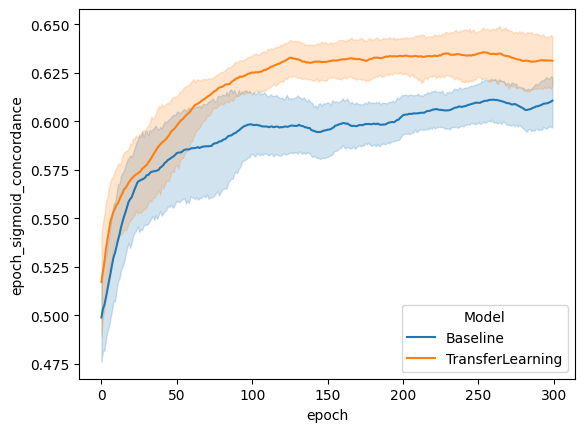

In [7]:
sns.lineplot(data=exps, x = 'epoch', 
             y = 'epoch_sigmoid_concordance', 
             hue = 'Model')

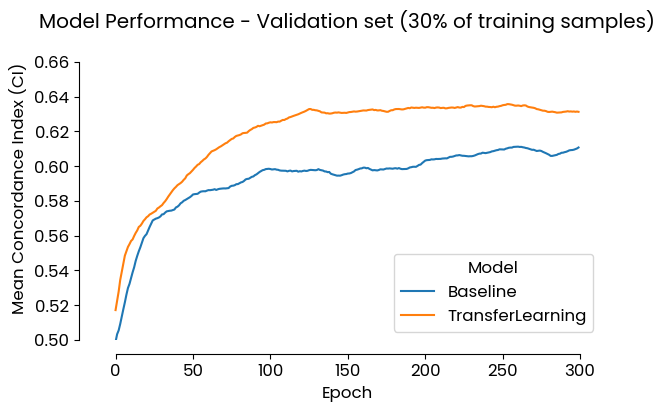

In [9]:
axs = subplots(cols=1, w=6, h=4)

res = res.groupby(['epoch', 'Model']).median().reset_index()
sns.lineplot(data=res, x='epoch', y='{}_mean'.format(metric), hue='Model', ax=axs[0], alpha=1);

#axs[0].set_xlim([0, 100])
axs[0].set_xlabel('Epoch', weight='bold')
axs[0].set_ylabel('Mean Concordance Index (CI)', weight='bold')
axs[0].set_ylim([0.5, 0.675])
axs[0].set_title('Model Performance - Validation set (30% of training samples)')
sns.despine(offset=10, trim=True);

Model with tranfer learning outperforms baseline model. 